# Distributions of various calibrated FUSE parameters and metrics 
Four FUSE instances. 

# Purpose

Perturbation bounds for DELSA

In [438]:
import glob, os
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore")

In [439]:
outdir = '/glade/work/manab/ff/islandpark/output/allens2'
#parlist = ['MAXWATR_1', 'MAXWATR_2', 'FRACTEN', 'PERCEXP']

prmsparam = sorted(glob.glob(outdir + '/*_111_para_best.nc'))
hechmsparam = sorted(glob.glob(outdir + '/*_222_para_best.nc'))
vicparam = sorted(glob.glob(outdir + '/*_333_para_best.nc'))
sacsmaparam = sorted(glob.glob(outdir + '/*_444_para_best.nc'))

# List of all netCDF variables and long_names

In [440]:
parlist = list(xr.open_dataset(prmsparam[0])) #Get a list of all netCDF variables

t = xr.open_dataset(prmsparam[0]) #Get a list of all netCDF variables
pardesclist = []
for var in t.variables.values():
    pardesc = var.attrs.get('long_name')
    pardesclist.append(pardesc)

In [441]:
def parExtract(nclist, parlist):
    '''Extracts a variable from a list of netCDF files
    
    nclist: List of netCDF files
    ncpar: Variable which you want to extract values
    '''
    #ncdat = []
    ncdat = pd.DataFrame([])
    for count, value in enumerate(nclist):
        ncout = xr.open_dataset(value).to_dataframe()
        parval = ncout[parlist]
        ncdat = ncdat.append(parval)
        #
    return(ncdat)

# FUSE (PRMS)

In [443]:
pardat = parExtract(prmsparam, parlist) 
pardat = pd.melt(pardat)  #tidy
parstat=pardat.describe() #Descriptive statistics
parstat.to_csv('prmsstats.csv') 

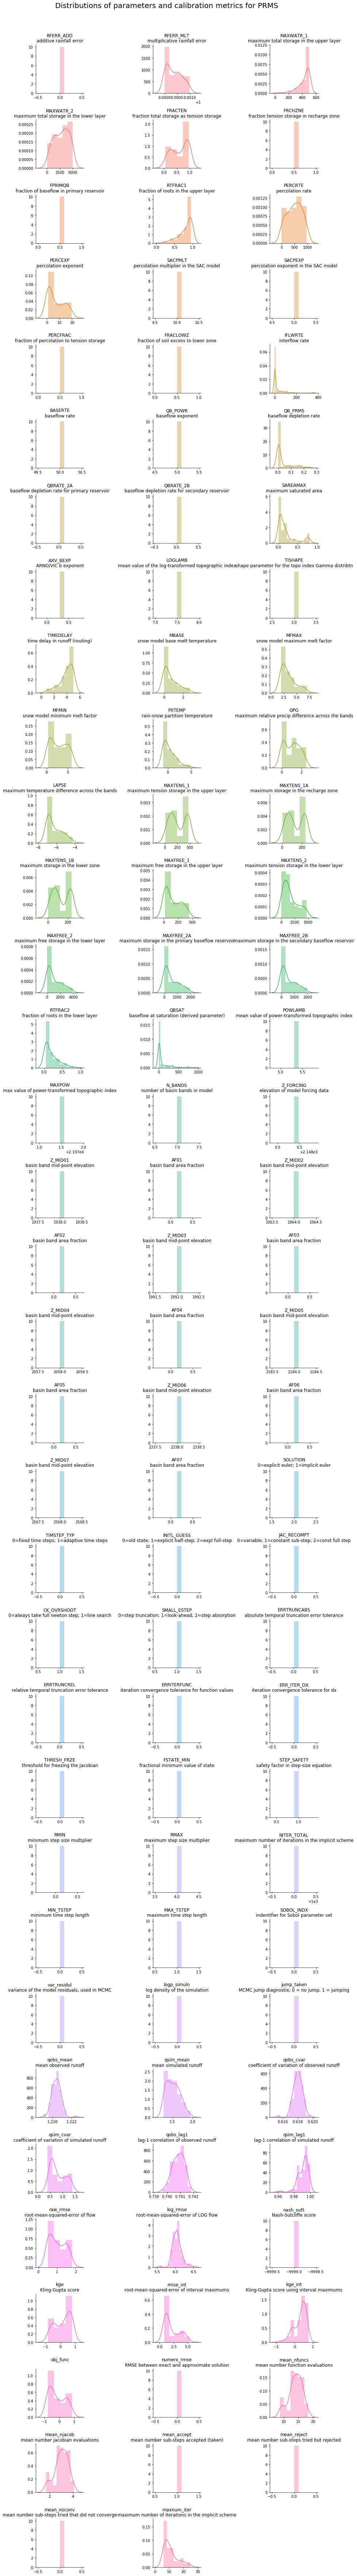

In [418]:
g = sns.FacetGrid(pardat, col="variable", col_order=parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, pardesc, in zip(g.axes.flat, parlist, pardesclist):
    ax.set_title(parname + "\n" +pardesc)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for PRMS', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE (HEC-HMS)

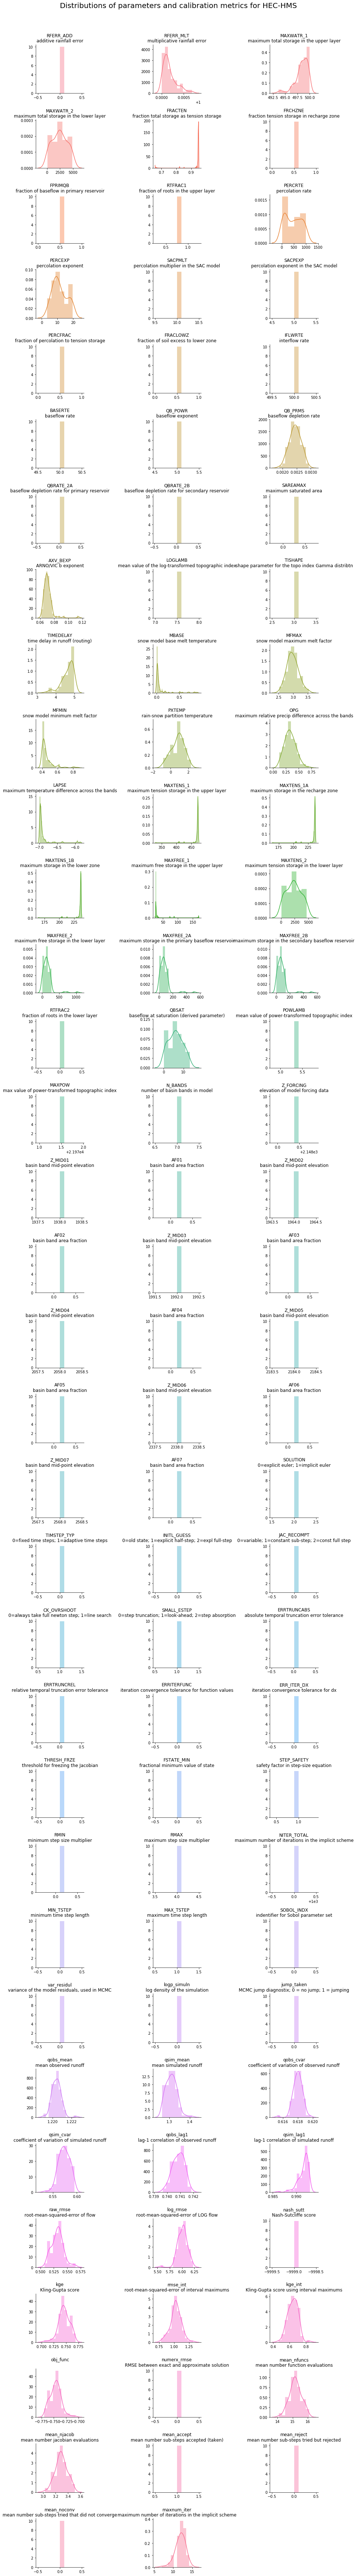

In [446]:
pardat = parExtract(hechmsparam, parlist) 
pardat = pd.melt(pardat)  #tidy
parstat=pardat.describe() #Descriptive statistics
parstat.to_csv('hechmsstats.csv')

g = sns.FacetGrid(pardat, col="variable", col_order=parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, pardesc, in zip(g.axes.flat, parlist, pardesclist):
    ax.set_title(parname + "\n" +pardesc)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for HEC-HMS', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE (VIC)

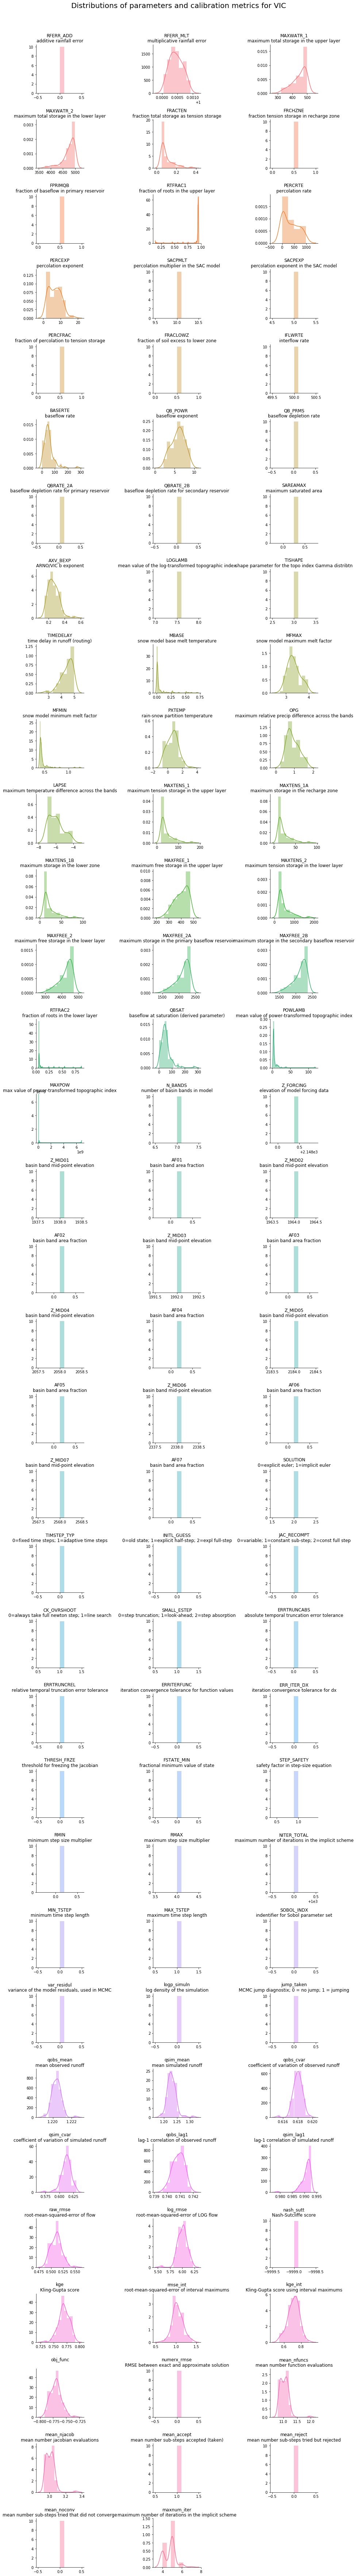

In [447]:
pardat = parExtract(vicparam, parlist) 
pardat = pd.melt(pardat)  #tidy
parstat=pardat.describe() #Descriptive statistics
parstat.to_csv('vicstats.csv')

g = sns.FacetGrid(pardat, col="variable", col_order=parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, pardesc, in zip(g.axes.flat, parlist, pardesclist):
    ax.set_title(parname + "\n" +pardesc)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for VIC', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE (SAC-SMA)

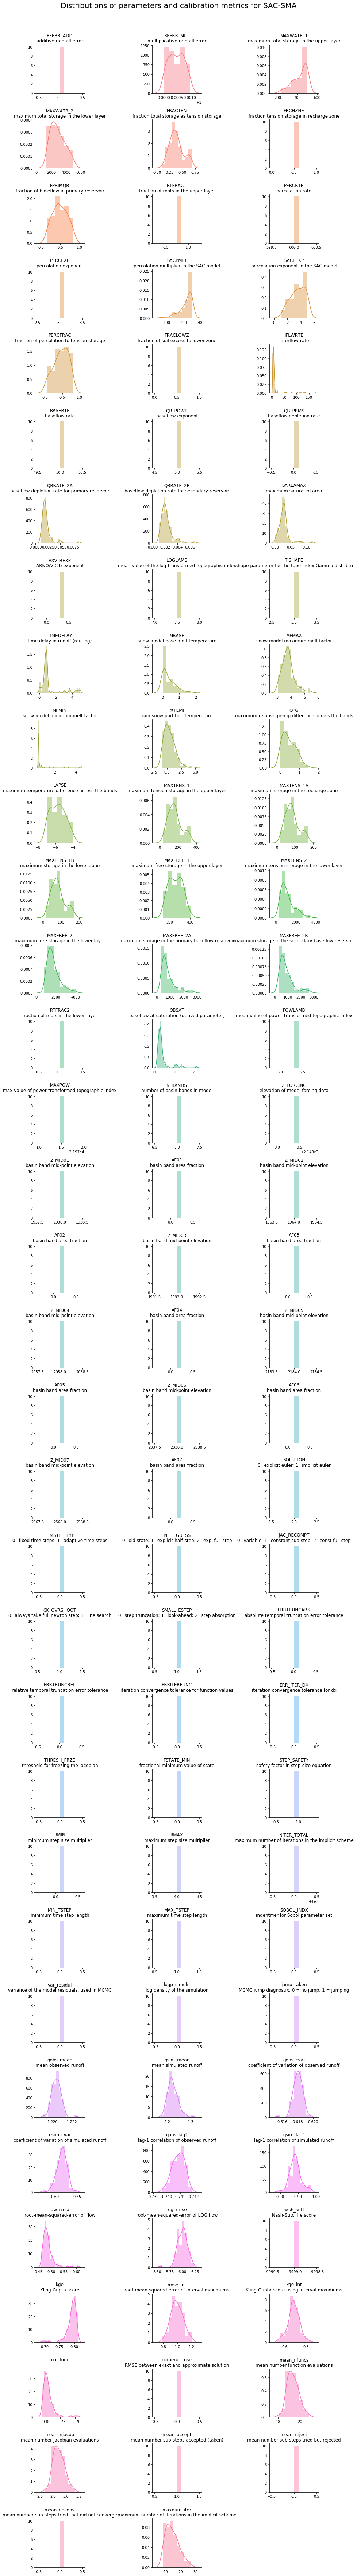

In [448]:
pardat = parExtract(sacsmaparam, parlist) 
pardat = pd.melt(pardat)  #tidy
parstat=pardat.describe() #Descriptive statistics
parstat.to_csv('sacsmastats.csv')

g = sns.FacetGrid(pardat, col="variable", col_order=parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, pardesc, in zip(g.axes.flat, parlist, pardesclist):
    ax.set_title(parname + "\n" +pardesc)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for SAC-SMA', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()